In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Latex, Image

from sklearn.model_selection import train_test_split

import markdown2
import tabulate

+ 기본 라이브러리 패키지

In [4]:
import pandas_explore as exp

In [5]:
# Titanic data
df_titanic = pd.read_csv('../data/titanic.csv').astype({'Survived':'object', 'Pclass':'object'})
df_titanic_train, df_titanic_test = train_test_split(df_titanic, test_size=0.2)
df_titanic_test = df_titanic_test.drop(columns=['Survived'])

In [6]:
# Diamonds data
df_diamonds = pd.read_csv('../data/diamonds.csv')
df_dia_train, df_dia_test = train_test_split(df_diamonds, test_size=0.2)

# Plot Concept

**변수의 관계 중심으로 좀 더 쉽게 사용하기 위한 함수로 재구성**

+ plot_num2num
    - 수치형 변수로 수치형 변수의 분포를 파악
    - 다이아몬드 캐럿의 크기와 가격의 분포
    - df, num_col, target_col, hue=None, shape=None
    - scatter plot
+ plot_cat2num
    - 카테고리형 변수로 수치형 변수의 분포를 파악
    - 다이아몬드 색상에 따른 가격대의 분포
    - df, cat_col, target_col
    - box plot
+ plot_cat2cat
    - 카테고리형 변수로 카테고리형 변수의 분포를 파악
    - 객실등급에 따른 생존률 분포
    - df, cat_col, target_col, opt_col(C x C -> C)
    - 옵션 : sample count, normalized count
    - bar plot
+ plot_cats2num
    - 카테고리형 변수의 조합별 수치형 변수의 분포
    - 생존여부, 객실등급별 연령대의 분포
    - df, cat_cols, num_col
    - histogram
+ plot_num2cat
    - 수치형 변수로 카테고리형 변수의 분포를 파악
    - 평균 3개월 ARPU에 따른 해지 분포
    - df, num_col, target_col, 
    - histogram, kde plot
+ plot_cats2binary
    - 카테고리형 변수의 조합별 이진값(예. 0,1)의 변화
    - df, cat_cols, target_col

+ 함수 공통 인터페이스
    - bypass : 기본값은 False로, True로 지정시 Plot 생성 후 Pandas 데이터프레임을 반환한다.
    - return_ax : ax 객체 반환 여부를 지정하며 기본값은 False이다.
    - save_only : 파일만 저장할 시 사용하는 옵션으로 기본값은 Flase이다.
    - image_fn : 이미지 파일 이름을 지정할 수 있다. uuid로 자동생성하기 때문에 중복 우려는 적다.
    - figsize : ax 객체의 사이즈를 임의 지정할 수 있다.

## 1. plot_num2num

In [28]:
print(exp.plot_num2num.__doc__)


    Scatter plot을 생성하는 seaborn wrapper 함수다.

    2개의 수치형 변수를 인자로 받아 plot을 생성한다.
    옵션으로 hue, style을 지정받을 수 있다.

    Arguments:
        df (Data Frame)
        num_col (str) : x axis
        target_col (str) : y axis
        hue (str): option
        style (str) : option

    Example:
        >>> plot_num2num(df_dia_train, 'carat', 'price', hue='color', style='cut', save_only=False, figsize=(12,8))
        >>> plot_num2num(df_dia_train, 'carat', 'price', hue='color', style='cut', bypass=True, figsize=(12,8))
    


In [23]:
# 이미지 생성만하고 별도 display하지 않음
exp.plot_num2num(df_dia_train, 'carat', 'price', save_only=True, figsize=(6,4))

'image/plot_num2num_carat_ef484296-fe30-44da-9cad-8d0f5524d4cd.png'

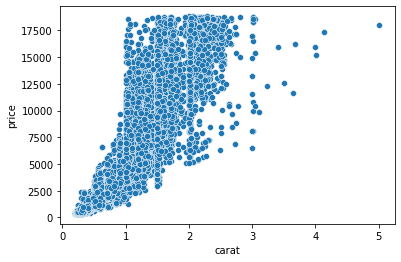

In [19]:
exp.plot_num2num(df_dia_train, 'carat', 'price', bypass=False, figsize=(6,4))

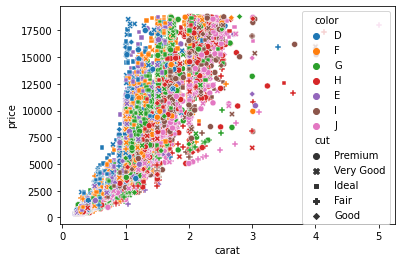

In [20]:
exp.plot_num2num(df_dia_train, 'carat', 'price', hue='color', style='cut', bypass=False, figsize=(6,4))

## 2. plot_cat2num

In [29]:
print(exp.plot_cat2num.__doc__)


    범주형과 수치형의 관계를 설명하기 위해 Box plot을 생성하는 seaborn wrapper 함수다.

    범주형 변수와 타겟 수치형 변수를 인자로 받아 plot을 생성한다.
    옵션으로 hue 값을 지정받을 수 있다.

    Arguments:
        df (Data Frame)
        cat_col (str) : x axis
        num_col (str) : y axis
        hue (str) : option

    Example:
        >>> plot_cat2num(df_dia_train, 'color', 'price', save_only=True)
        >>> plot_cat2num(df_dia_train, 'color', 'price', hue='cut', figsize=(15, 8))
    


In [16]:
exp.plot_cat2num(df_dia_train, 'color', 'price', save_only=True)

'image/plot_cat2num_color_c6bed21e-0a9b-445d-a4f1-968aba98d3c3.png'

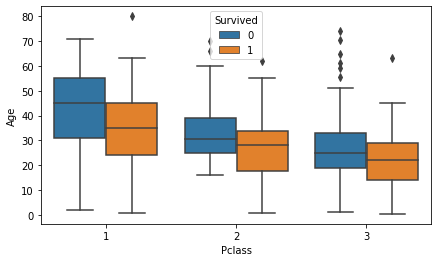

In [17]:
exp.plot_cat2num(df_titanic, 'Pclass', 'Age', hue='Survived', figsize=(7,4))

## 3. plot_num2hist

In [30]:
print(exp.plot_num2hist.__doc__)


    수치형 변수의 히스토그램을 생성하는 함수다.

    별도의 bins 값 지정이 없으면 Freedman 기준으로 bins 값을 생성한다.

    Arguments:
        df (Data Frame)
        num_col (str) : x axis
        cat_cols (list) : 1개 혹은 2개의 범주형 변수를 인자로 받아서 분할하여 보여준다.
        bins : 입력하지 않을 시 별도 적절한 값을 계산하여 반영한다.
        
    Example:
        >>> plot_num2hist(df_titanic, ['Survived', 'Pclass'], 'Age')
    


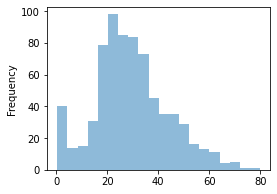

In [32]:
exp.plot_num2hist(df_titanic, 'Age', figsize=(4,3))

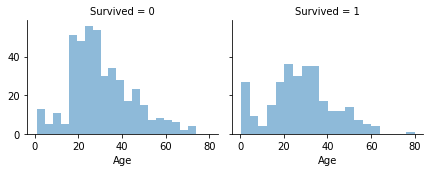

In [34]:
# 1개의 카테고리로 분할하여 보여준다.
exp.plot_num2hist(df_titanic, 'Age', ['Survived'], figsize=(3,2.5))

In [36]:
exp.plot_num2hist(df_titanic, 'Age', ['Survived'], figsize=(3,2), save_only=True)

'image/plot_num2hist_Age_9e7723ba-fff8-45e7-932a-25dc97f2e934.png'

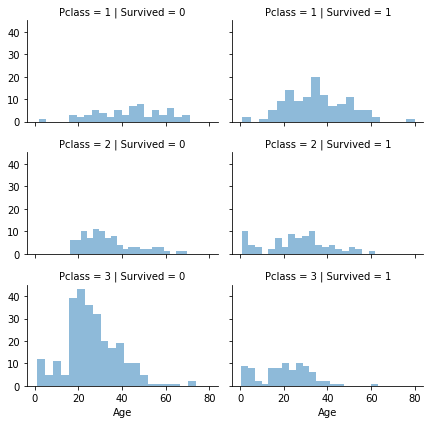

In [37]:
# 2개의 카테고리로 분할하여 보여준다.
exp.plot_num2hist(df_titanic, 'Age', ['Survived', 'Pclass'], figsize=(3,2))

In [43]:
exp.plot_num2hist(df_titanic, 'Age', ['Survived', 'Pclass'], figsize=(3,2), save_only=True)

'image/plot_num2hist_Age_f2e40eb5-8f2b-4fb9-8c3b-4acd3fd67492.png'

## 4. plot_cat2cat

In [44]:
print(exp.plot_cat2cat.__doc__)


    범주형과 범주형의 관계를 설명하기 위한 seaborn catplot wrapper 함수다.

    1개의 범주형 변수와 1개의 타겟 범주형 변수를 입력 받아 bar chart로 변량을 설명한다.
    옵션으로 추가적인 col을 입력받아 2개의 범주형 변수에 따른 1개의 범주형 타겟 변수의 변량 이해가 가능하다.

    Arguments:
        df (Data Frame)
        cat_col (str)
        target_col (str)
        col (str) : None 기본 값
        col_wrap : None 기본 값, 최대 열의 개수
        normalized (boolean) : Normalize 옵션으로 True 지정시 cat_col 변수 기준으로 target_col의 비율 분포를 보여준다.

    Example:
        >>> plot_cat2cat(df_titanic_train, 'Pclass', 'Survived', col='Sex')
        >>> plot_cat2cat(df_titanic_train, 'Pclass', 'Survived')
        >>> plot_cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=True)
        >>> plot_cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=False, save_only=False)
    


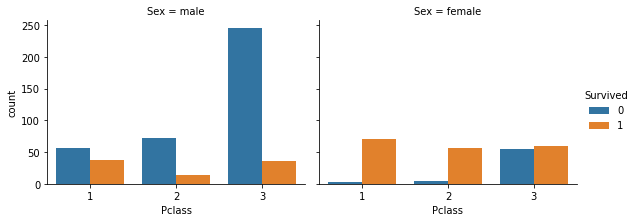

In [39]:
exp.plot_cat2cat(df_titanic_train, 'Pclass', 'Survived', col='Sex', figsize=(4,3))

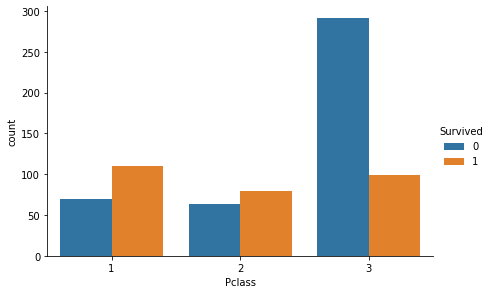

In [66]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived')

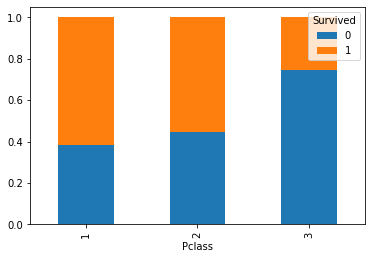

In [67]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=True)

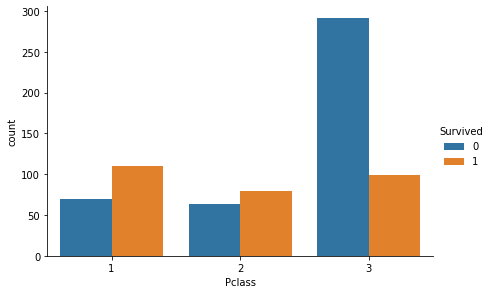

In [68]:
exp.cat2cat(df_titanic_train, 'Pclass', 'Survived', normalized=False, save_only=False)

### plot_cat2pie 

In [42]:
print(exp.plot_cat2pie.__doc__)


    범주형 변수의 개수를 취합하여 Pie plot을 생성한다.

    Arguments:
        df (Data Frame)
        cat_col (str)

    Example:
        >>> plot_cat2pie(df_titanic, 'Pclass', figsize=(3,3))
    


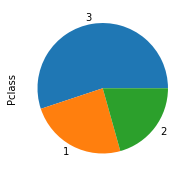

In [63]:
exp.plot_cat2pie(df_titanic, 'Pclass', figsize=(3,3))

## 5. plot_num2cat

In [7]:
print(exp.plot_num2cat.__doc__)


    수치형 변수 변동와 범주형 변수의 관계 이해를 위한 seaborn wrapper 함수이다.

    seaborn kdeplot을 사용하며 multiple 옵션으로 비율 확인이 가능하다.

    Arguments:
        df (Data Frame)
        cat_col (str)
        target_col (str)
        multiple (str) : 'layer' 혹은 'fill' 옵션 사용 가능

    Example:
        >>> plot_n2c(df_titanic, 'Age', 'Survived', multiple='fill')
        >>> plot_n2c(df_titanic, 'Age', 'Survived', multiple='layer')
    


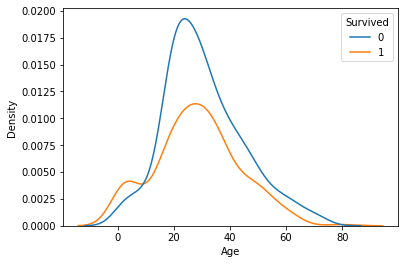

In [26]:
exp.plot_num2cat(df_titanic, 'Age', 'Survived', multiple='layer')

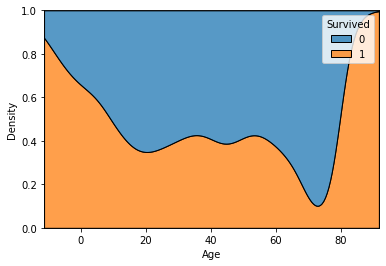

In [23]:
exp.plot_num2cat(df_titanic, 'Age', 'Survived', multiple='fill')

## 6. plot_cats2point

In [61]:
print(exp.plot_cats2point.__doc__)


    최대 3개의 범주형 변수에 따른 수치형 변수의 변동량을 이해할 수 있다.

    만약 Titanic의 Survived 변수를 타겟으로 입력하고자 할 때는 0, 1로 인코딩하여 활용할 수 있다.

    Example:
        >>> # from 1 category to numeric
        >>> tips = sns.load_dataset("tips")
        >>> pplot_cats2point(tips, ['time'], 'total_bill', figsize=(4,3))

        >>> plot_cats2point(df_titanic.assign(relatives = lambda df: df.Parch + df.SibSp), ['relatives'], 'Survived')      

        >>> # from 2 categories to numeric
        >>> plot_cats2point(df_titanic, ['Pclass', 'Sex'], 'Survived')

        >>> # from 3 categories to numeric
        >>> plot_cats2point(df_titanic, ['Pclass', 'Sex', 'Embarked'], 'Survived')
    


1) category nums == 1

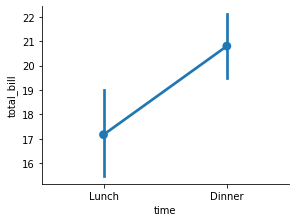

In [56]:
tips = sns.load_dataset("tips")
exp.plot_cats2point(tips, ['time'], 'total_bill', figsize=(4,3))

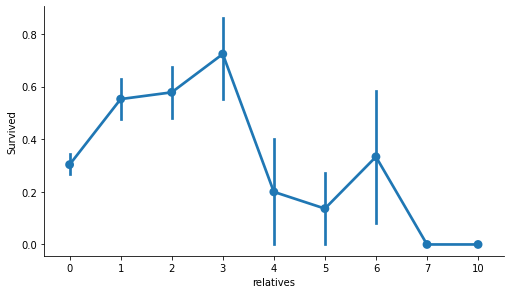

In [58]:
exp.plot_cats2point(df_titanic.assign(relatives = lambda df: df.Parch + df.SibSp), ['relatives'], 'Survived', figsize=(7,4))

2) category nums == 2

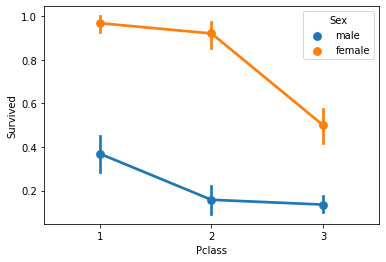

In [59]:
exp.plot_cats2point(df_titanic, ['Pclass', 'Sex'], 'Survived')

3) category nums == 3

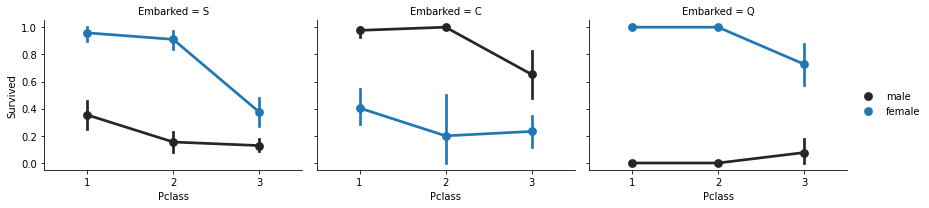

In [60]:
exp.plot_cats2point(df_titanic, ['Pclass', 'Sex', 'Embarked'], 'Survived', figsize=(4,3))